In [31]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import os, sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.functions import test_model, get_timeseries_table

In [22]:
window = 135
df = get_timeseries_table(prediction_window=window, binary_labels=True, one_hot_modules=True)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('final_result',axis=1), df.final_result, random_state=111)

In [16]:
X_train

,assess_submitted_1,assess_score_1,assess_submitted_2,assess_score_2,assess_submitted_3,assess_score_3,assess_submitted_4,assess_score_4,assess_submitted_5,assess_score_5,...,sum_activities_134,sum_click_134,activities_x_clicks_134,module_AAA,module_BBB,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG
registration,,,,,,,,,,,,,,,,,,,,,
AAA2014J315744,-1.0,81.0,3.0,76.0,7.0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
FFF2014J638625,-4.0,94.0,-8.0,88.0,-9.0,89.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
FFF2013J572845,-2.0,92.0,-1.0,78.0,-1.0,94.0,-2.0,91.0,0.0,0.0,...,13.0,84.0,1092.0,0,0,0,0,0,1,0
AAA2014J2522927,-3.0,82.0,-2.0,52.0,-1.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
FFF2013B560182,-1.0,90.0,-1.0,92.0,0.0,93.0,-3.0,97.0,0.0,0.0,...,6.0,28.0,168.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCC2014J433794,3.0,100.0,-10.0,96.0,2.0,83.0,-1.0,88.0,0.0,0.0,...,1.0,1.0,1.0,0,0,1,0,0,0,0
BBB2014B2444501,7.0,40.0,2.0,60.0,2.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
BBB2014J684184,-17.0,100.0,-3.0,84.0,-1.0,95.0,0.0,0.0,0.0,0.0,...,3.0,6.0,18.0,0,1,0,0,0,0,0


In [27]:
roc_auc = make_scorer(roc_auc_score, needs_proba=True)

In [29]:
model = pickle.load(open('time_series_xgb_best_smote.pkl', 'rb'))

unscaled_scores = cross_val_score(model, X_train, y_train, scoring=roc_auc)

array([0.87867038, 0.88134559, 0.88774047, 0.88927755, 0.87299252])

In [28]:
clf = pickle.load(open('time_series_xgb_best_smote.pkl', 'rb'))
scaler = StandardScaler()
steps = [('scaler', scaler),('model', clf)]
xgbpipe = Pipeline(steps=steps)
scaled_scores = cross_val_score(xgbpipe, X_train, y_train, scoring=roc_auc)

array([0.88118874, 0.87927712, 0.88949853, 0.88822839, 0.8696158 ])

In [32]:
smoter = SMOTE()
steps = [('smoter', smoter), ('scaler', scaler), ('model', model)]

smote_pipe = Pipeline(steps=steps)

smote_scaled_scores = cross_val_score(smote_pipe, X_train, y_train)
smote_scaled_scores



array([0.82954545, 0.83532498, 0.83241038, 0.83794812, 0.81871175])

In [33]:
model.fit(X_train, y_train)
unscaled_roc_auc = roc_auc(model, X_test, y_test)

xgbpipe.fit(X_train, y_train)
scaled_roc_auc = roc_auc(xgbpipe, X_test, y_test)

smote_pipe.fit(X_train, y_train)
scaled_smoted_roc_auc = roc_auc(smote_pipe, X_test, y_test)

print('scaled roc_auc: ', scaled_roc_auc)
print('unscaled_roc_auc: ', unscaled_roc_auc)
print('scaled, smoted roc_auc: ', scaled_smoted_roc_auc)

scaled roc_auc:  0.8842540033688907
unscaled_roc_auc:  0.8850772076798716
scaled, smoted roc_auc:  0.8851398156299983


In [36]:
y_pred = smote_pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3846
           1       0.77      0.70      0.73      1873

    accuracy                           0.83      5719
   macro avg       0.81      0.80      0.81      5719
weighted avg       0.83      0.83      0.83      5719



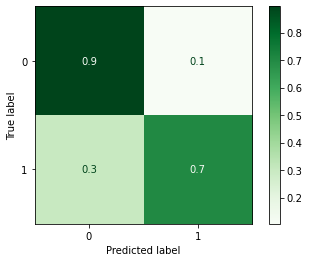

In [52]:
plot_confusion_matrix(smote_pipe, X_test, y_test, normalize='true', cmap='Greens')